## Linear Regression Assignment - BoomBikes

**Business Goal:**
It is required to model the demand for shared bikes with the available independent variables. It will be used by the BoomBikes management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

###### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import calendar

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

###### Reading the data

In [2]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Performing null checks

In [3]:
data.isna().mean().mean() == 0

True

**Observations**: There are no nulls in the data

###### Checking the data

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Processing data

##### Substituting the Categorical Variables which have integer coding

###### Season

In [5]:
def substituteData(col, map):
    data[col] = data[col].apply(lambda x: map.get(x))

substituteData('season', {1:'spring', 2:'summer', 3:'fall', 4:'winter'})
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Weathersit

In [6]:
substituteData('weathersit', {1:'clear', 2:'misty', 3:'light_snow', 4:'heavy_rain'})
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Weekday

In [7]:
substituteData('weekday', {day_index:calendar.day_name[day_index-1] for day_index in range(0,7) })
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Month

In [8]:
substituteData('mnth', {month_idx: calendar.month_name[month_idx] for month_idx in range(1, 13)})
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Saturday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Sunday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Year

In [9]:
substituteData('yr', {0:2018, 1:2019})
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,0,Saturday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,0,Sunday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Exploratory Data Analysis

###### Categorical Variables: Summing the number of rentals and grouping by Month, Season, Weekday and Weather situation to visualize data

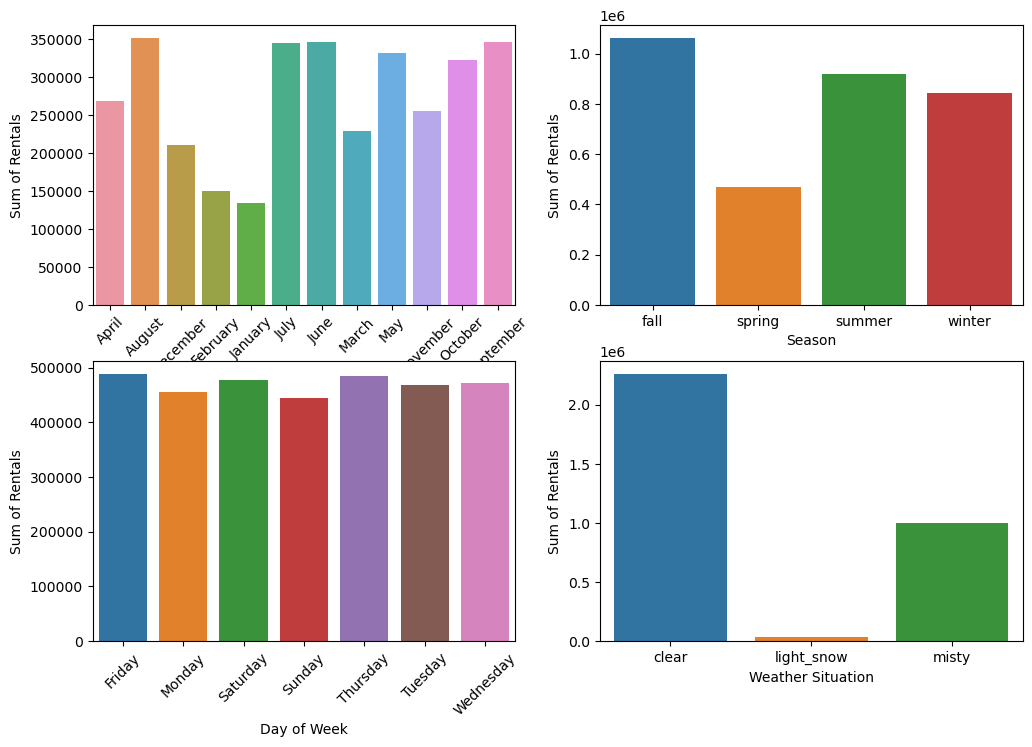

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.barplot(ax=axes[0][0], data=data[['mnth', 'cnt']].groupby(['mnth'], as_index=False).sum(), x='mnth', y='cnt')
axes[0][0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Sum of Rentals")

sns.barplot(ax=axes[0][1], data=data[['season', 'cnt']].groupby(['season'], as_index=False).sum(), x='season', y='cnt')
axes[0, 1].set_xlabel("Season")
axes[0, 1].set_ylabel("Sum of Rentals")

sns.barplot(ax=axes[1][0], data=data[['weekday', 'cnt']].groupby(['weekday'], as_index=False).sum(), x='weekday', y='cnt')
axes[1][0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel("Day of Week")
axes[1, 0].set_ylabel("Sum of Rentals")

sns.barplot(ax=axes[1][1], data=data[['weathersit', 'cnt']].groupby(['weathersit'], as_index=False).sum(), x='weathersit', y='cnt')
axes[1, 1].set_xlabel("Weather Situation")
axes[1, 1].set_ylabel("Sum of Rentals")

plt.show()

**Observations**:
1. The months June, July, August and September have highest number of rentals whereas January, February and March have lowest Rentals
2. Fall season has the highest number of rentals whereas Spring season has lowest rentals.
3. There is not much to differentiate between days
4. When the weather is clear, the rentals are high whereas rentals are at their lowest when the weather is Snowing.

###### Numeric Variables: Visualizing the data Temperature, Feeling Temperature, Humidity and Windspeed on a scatter plot.

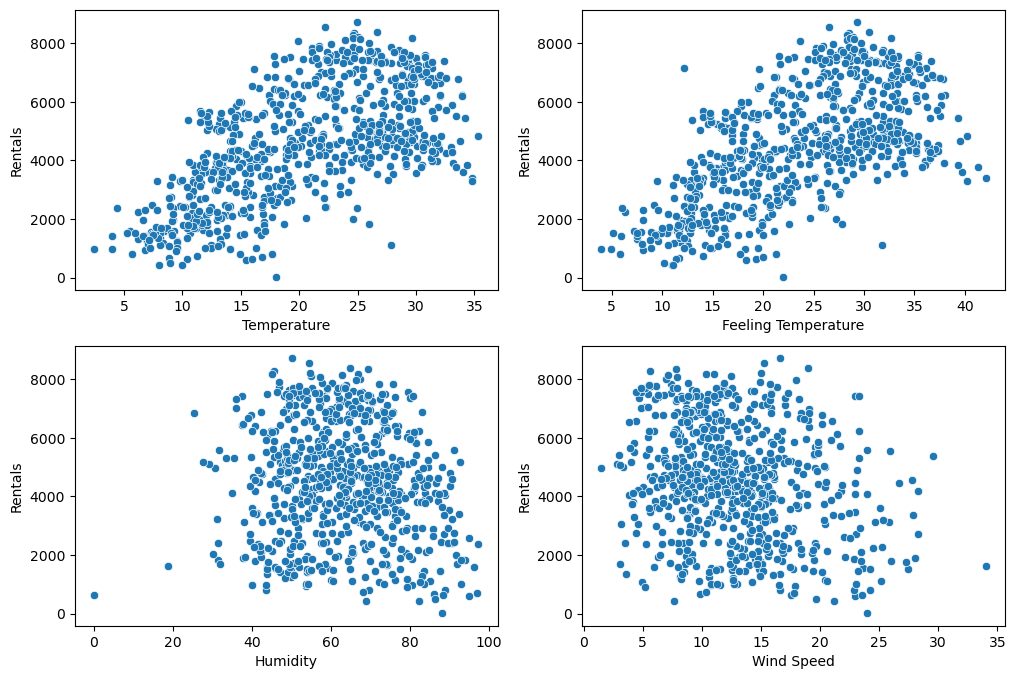

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.scatterplot(ax=axes[0][0], data=data, x='temp', y='cnt')
axes[0, 0].set_xlabel("Temperature")
axes[0, 0].set_ylabel("Rentals")

sns.scatterplot(ax=axes[0][1], data=data, x='atemp', y='cnt')
axes[0, 1].set_xlabel("Feeling Temperature")
axes[0, 1].set_ylabel("Rentals")

sns.scatterplot(ax=axes[1][0], data=data, x='hum', y='cnt')
axes[1, 0].set_xlabel("Humidity")
axes[1, 0].set_ylabel("Rentals")

sns.scatterplot(ax=axes[1][1], data=data, x='windspeed', y='cnt')
axes[1, 1].set_xlabel("Wind Speed")
axes[1, 1].set_ylabel("Rentals")


plt.show()


###### Finding correlation between continuous variables

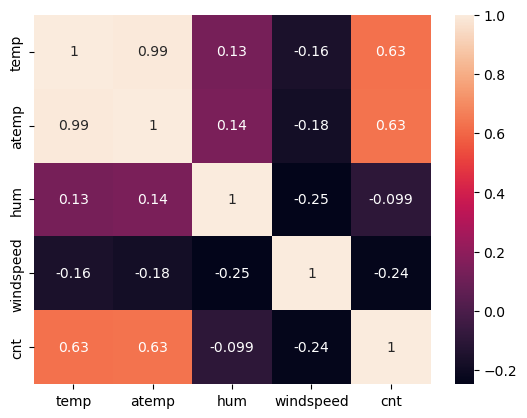

In [12]:
sns.heatmap(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True)
plt.show()

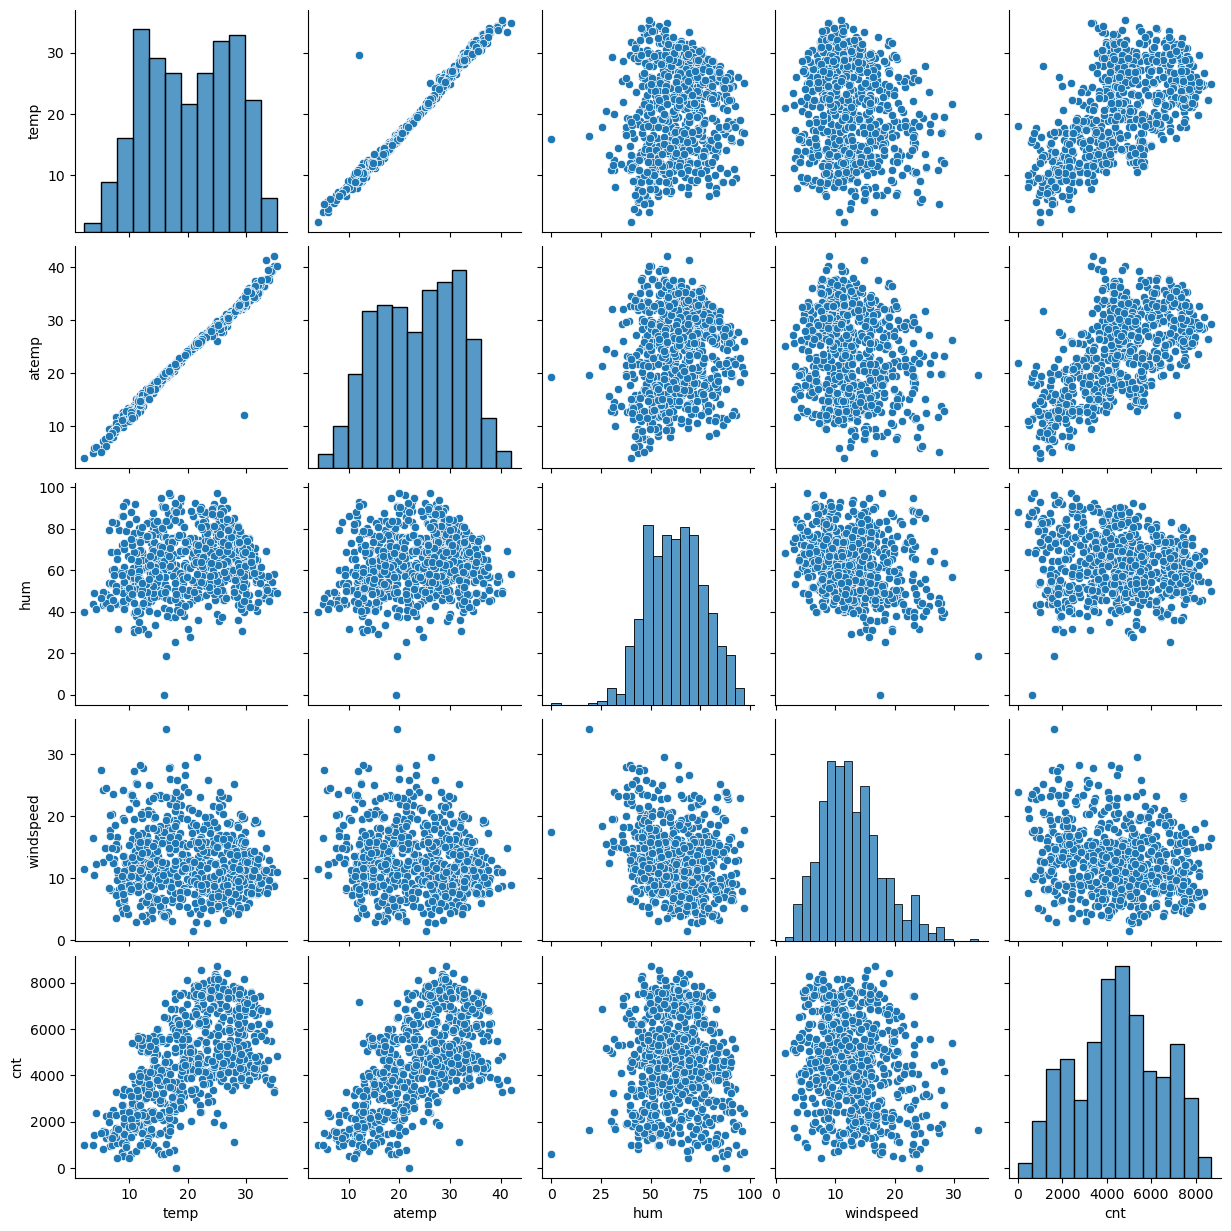

In [13]:
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

**Observations**:
1. Temperature and Feeling Temperature are linearly related to Rentals
2. When humidity is more, rentals are High
3. When windspeed is less, rentals are high.

###### Visualizing the co-relation between all numeric (as per original data) variables

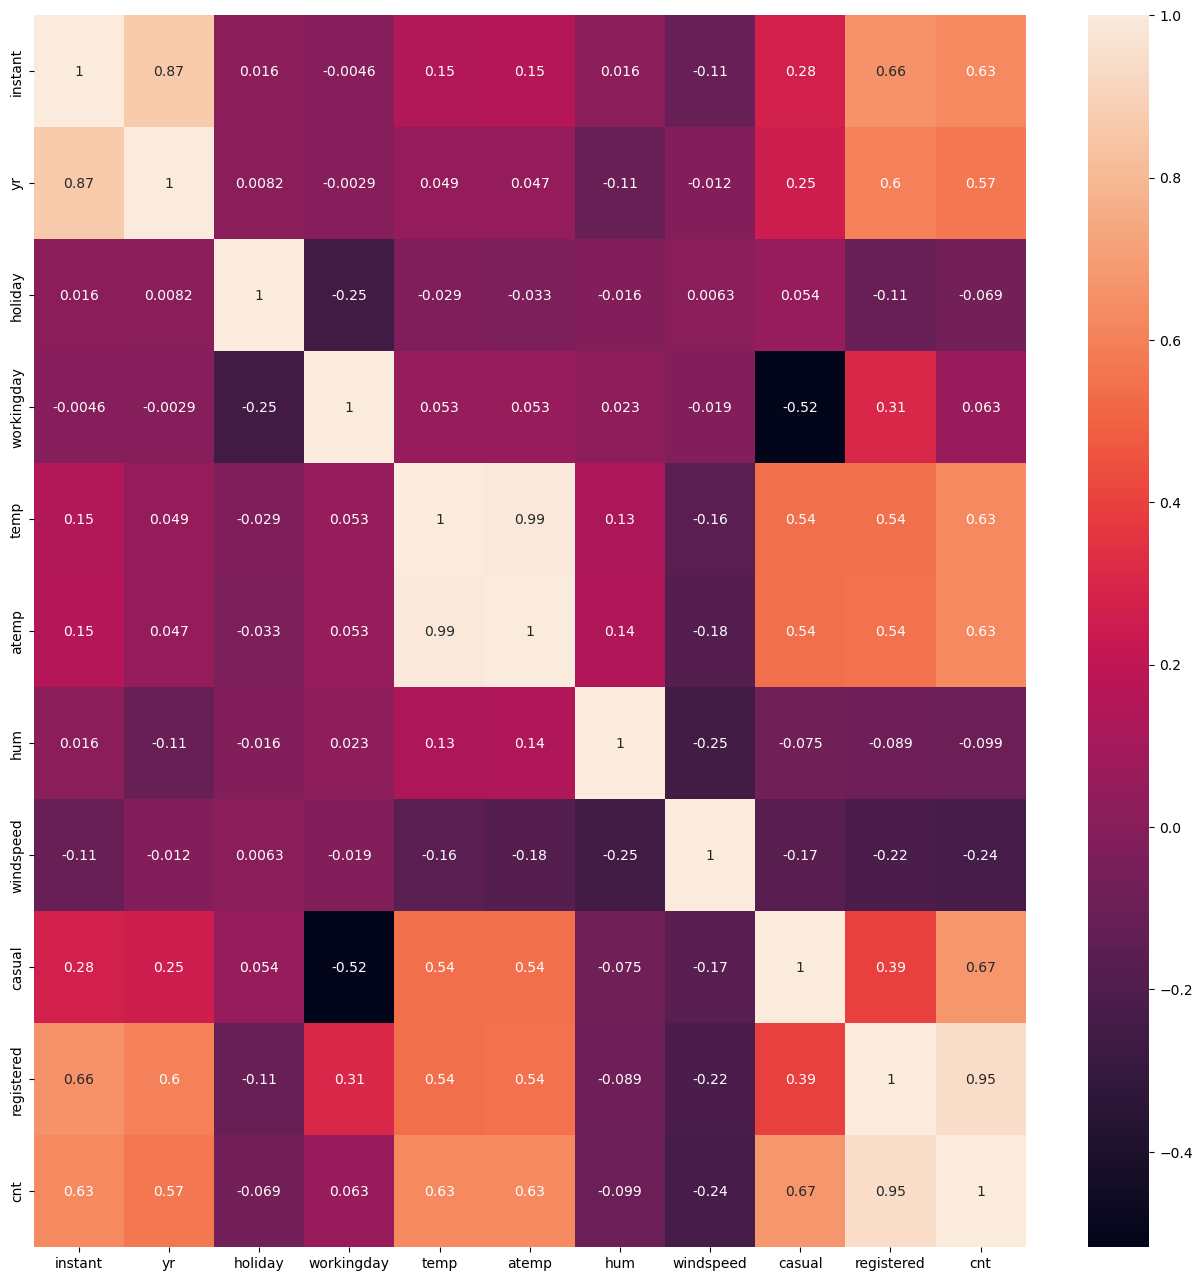

In [14]:
plt.figure(figsize = (16, 16))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot = True)
plt.show()

**Observations**:

**Looking to drop co-related variables.**
1. 'registered' and 'casual' are very closely co-related to 'cnt'. Since 'cnt' is the sum of 'registered' and 'casual', they can be dropped
2. 'temp' and 'atemp' are closely related. 'atemp' can be dropped.
3. 'yr' and 'instant' are co-related. 'instant' can be dropped.

**Other Observations**
1. On a working day, there are more registered users renting out.
2. On a holiday, there are comparitively more casual users than registered users.

###### Dropping correlated variables.

In [15]:
data.drop(['registered', 'casual', 'atemp', 'instant', 'dteday'], axis=1, inplace=True)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,January,0,Saturday,0,misty,14.110847,80.5833,10.749882,985
1,spring,2018,January,0,Sunday,0,misty,14.902598,69.6087,16.652113,801
2,spring,2018,January,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,January,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,January,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,December,0,Thursday,1,misty,10.420847,65.2917,23.458911,2114
726,spring,2019,December,0,Friday,1,misty,10.386653,59.0000,10.416557,3095
727,spring,2019,December,0,Saturday,0,misty,10.386653,75.2917,8.333661,1341
728,spring,2019,December,0,Sunday,0,clear,10.489153,48.3333,23.500518,1796


#### Changing categorical variables to dummy columns

In [16]:
data = pd.get_dummies(data=data, columns=['mnth', 'season', 'weekday', 'weathersit'], dtype=int, drop_first=True)
data

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_snow,weathersit_misty
0,2018,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,0,1,10.420847,65.2917,23.458911,2114,0,1,0,...,0,0,0,0,0,1,0,0,0,1
726,2019,0,1,10.386653,59.0000,10.416557,3095,0,1,0,...,0,0,0,0,0,0,0,0,0,1
727,2019,0,0,10.386653,75.2917,8.333661,1341,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,2019,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,0,0,0,1,0,0,0,0,0


###### Figuring out the correlation of each variable with target variable

In [17]:
corr_df = data.corr()
corr_df[['cnt']].sort_values(by='cnt', key=lambda x:abs(x), ascending=False)

,cnt
cnt,1.000000
temp,0.627044
yr,0.569728
season_spring,-0.561702
mnth_January,-0.367167
mnth_February,-0.273848
weathersit_light_snow,-0.240602
windspeed,-0.235132
mnth_June,0.195568
mnth_September,0.194664


**Observation**: temp, yr and season_spring are the variables having most correlation with cnt.

## Splitting into Training and Test data set

In [18]:
np.random.seed(42)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Scaling using MinMax Scaling. Applying Scaling to all numeric variables

In [19]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt', 'yr' ]

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,...,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_snow,weathersit_misty
653,1.0,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1.0,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1.0,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1.0,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,1,0,0,0,0,0,1


###### Splitting into X_train and y_train

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train

## Column Selection

#### Iteration 1 - Using RFE method to select columns - Arbitrarily selecting 12 columns

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=12)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [22]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', False, 6),
 ('mnth_February', False, 7),
 ('mnth_January', False, 4),
 ('mnth_July', True, 1),
 ('mnth_June', False, 16),
 ('mnth_March', False, 17),
 ('mnth_May', False, 8),
 ('mnth_November', False, 5),
 ('mnth_October', False, 13),
 ('mnth_September', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 10),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 15),
 ('weathersit_light_snow', True, 1),
 ('weathersit_misty', True, 1)]

In [23]:
cols = X_train.columns[rfe.support_]

#### Building stats model for detailed stats

In [24]:
X_train_lm = sm.add_constant(X_train[cols])
lr = sm.OLS(y_train, X_train_lm).fit()

In [25]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.69e-190
Time:                        10:39:10   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2841      0.034      8.242      0.000       0.216       0.352
yr                        0.2293      0.008     28.219      0.000       0.213       0.245
holiday                  -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                      0.5300      0.034     15.739      0.000       0.464       0.596
hum                      -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                -0.1819      0.026     -7.066      0.000      -0.233      -0.131
mnth_July                -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_September            0.0830      0.017      4.962      0.000       0.050       0.116
season_spring            -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_summer             0.0519      0.015      3.457      0.001       0.022       0.081
season_winter             0.0987      0.017      5.719      0.000       0.065       0.133
weathersit_light_snow    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_misty         -0.0542      0.011     -5.151      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### VIF

In [26]:
vif = pd.DataFrame()
vif['Features'] = cols
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
7,season_spring,4.01
9,season_winter,3.35
8,season_summer,2.78
11,weathersit_misty,2.28
0,yr,2.08
5,mnth_July,1.58
6,mnth_September,1.38


**Observations**:
1. p-value for all the variables is good
2. R-squared for the variable selection is very good at 84.2%
3. VIF for 'hum' and 'temp' is very high.

As a next step, dropping the 'hum' variable and re-calculating the metrics.

#### Iteration 2 - Dropping 'hum' from the above model

In [27]:
cols = cols.drop(['hum'])
X_train_lm = sm.add_constant(X_train[cols])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.40e-187
Time:                        10:39:10   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1996      0.030      6.758      0.000       0.142       0.258
yr                        0.2335      0.008     28.361      0.000       0.217       0.250
holiday                  -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                      0.4915      0.033     14.798      0.000       0.426       0.557
windspeed                -0.1480      0.025     -5.893      0.000      -0.197      -0.099
mnth_July                -0.0524      0.019     -2.811      0.005      -0.089      -0.016
mnth_September            0.0767      0.017      4.511      0.000       0.043       0.110
season_spring            -0.0669      0.021     -3.167      0.002      -0.108      -0.025
season_summer             0.0453      0.015      2.971      0.003       0.015       0.075
season_winter             0.0831      0.017      4.818      0.000       0.049       0.117
weathersit_light_snow    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
weathersit_misty         -0.0816      0.009     -9.301      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Calculating VIF after dropping 'hum'

In [28]:
vif = pd.DataFrame()
vif['Features'] = cols
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,season_summer,2.21
6,season_spring,2.08
0,yr,2.07
8,season_winter,1.79
4,mnth_July,1.58
10,weathersit_misty,1.55
5,mnth_September,1.34
9,weathersit_light_snow,1.08


**Observations**:
1. p-value for all the variables is good
2. R-squared for the variable selection is very good at 83.6%
3. VIF for 'temp' is on the higher side.

Although 'temp' is the variable having highest VIF, it should not be dropped since we know that cnt is having highest correlation with temp. So selecting 'mnth_July' because it has highest p-value.

#### Iteration 3 - Dropping 'mnth_July' from the above model


In [29]:
cols = cols.drop(['mnth_July'])
X_train_lm = sm.add_constant(X_train[cols])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.36e-187
Time:                        10:39:10   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1910      0.030      6.456      0.000       0.133       0.249
yr                        0.2341      0.008     28.246      0.000       0.218       0.250
holiday                  -0.0969      0.026     -3.691      0.000      -0.148      -0.045
temp                      0.4782      0.033     14.446      0.000       0.413       0.543
windspeed                -0.1482      0.025     -5.860      0.000      -0.198      -0.098
mnth_September            0.0909      0.016      5.565      0.000       0.059       0.123
season_spring            -0.0551      0.021     -2.641      0.009      -0.096      -0.014
season_summer             0.0610      0.014      4.271      0.000       0.033       0.089
season_winter             0.0959      0.017      5.730      0.000       0.063       0.129
weathersit_light_snow    -0.2860      0.025    -11.492      0.000      -0.335      -0.237
weathersit_misty         -0.0801      0.009     -9.090      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       63.599   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.759
Skew:                          -0.674   Prob(JB):                     6.07e-32
Kurtosis:                       5.225   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
vif = pd.DataFrame()
vif['Features'] = cols
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
5,season_spring,1.99
6,season_summer,1.89
7,season_winter,1.63
9,weathersit_misty,1.54
4,mnth_September,1.23
8,weathersit_light_snow,1.08
1,holiday,1.04


**Observations**:
1. p-value for all the variables is good - well below 0.05
2. R-squared for the variable selection is very good at 83.3%
3. VIF for all variables is below 5.

###### This can be considered as final model.
Continuing with further evaluation.

## Residual Analysis of the train data

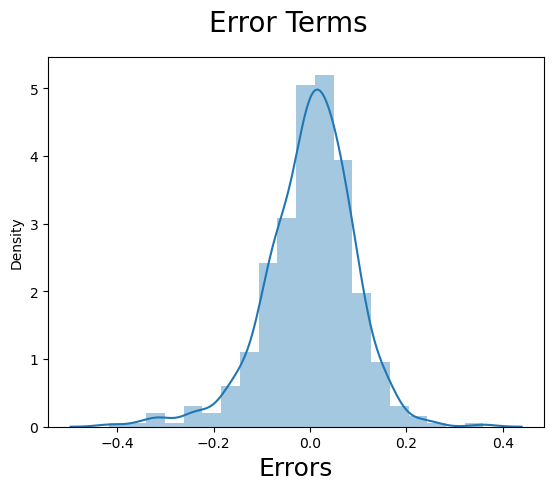

The mean of errors is -4.745659203299689e-16


In [31]:
y_train_pred = lr.predict(X_train_lm)
residuals = y_train - y_train_pred
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()
print(f'The mean of errors is {residuals.mean()}')  

**Observations**:
1. Errors are normally distributed
2. The mean of Errors is very small (-4.75x10<sup>-16</sup>)

###### Prepare the final training set and creating the scikit learn LinearRegression fit

In [32]:
X_train_final = df_train[cols]
X_train_final

,yr,holiday,temp,windspeed,mnth_September,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_misty
653,1.0,0,0.509887,0.300794,0,0,0,1,0,0
576,1.0,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,0,0.442393,0.255342,0,1,0,0,0,1
728,1.0,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,0,0.395666,0.188475,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
526,1.0,0,0.824514,0.355596,0,0,1,0,0,1
578,1.0,0,0.863973,0.187140,0,0,0,0,0,0
53,0.0,0,0.202618,0.111379,0,1,0,0,0,0
350,0.0,0,0.248216,0.431816,0,0,0,1,0,1


In [33]:
lm = LinearRegression()
lm.fit(X_train_final, y_train)

LinearRegression()

## Making Predictions Using the Final Model

###### Scaling the test dataset

In [34]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

###### Creating the test datasets

In [35]:
y_test = df_test.pop('cnt')
X_test = df_test[cols]

In [36]:
y_test_pred = lm.predict(X_test)

## Model Evaluation

#### Variance of Error Terms

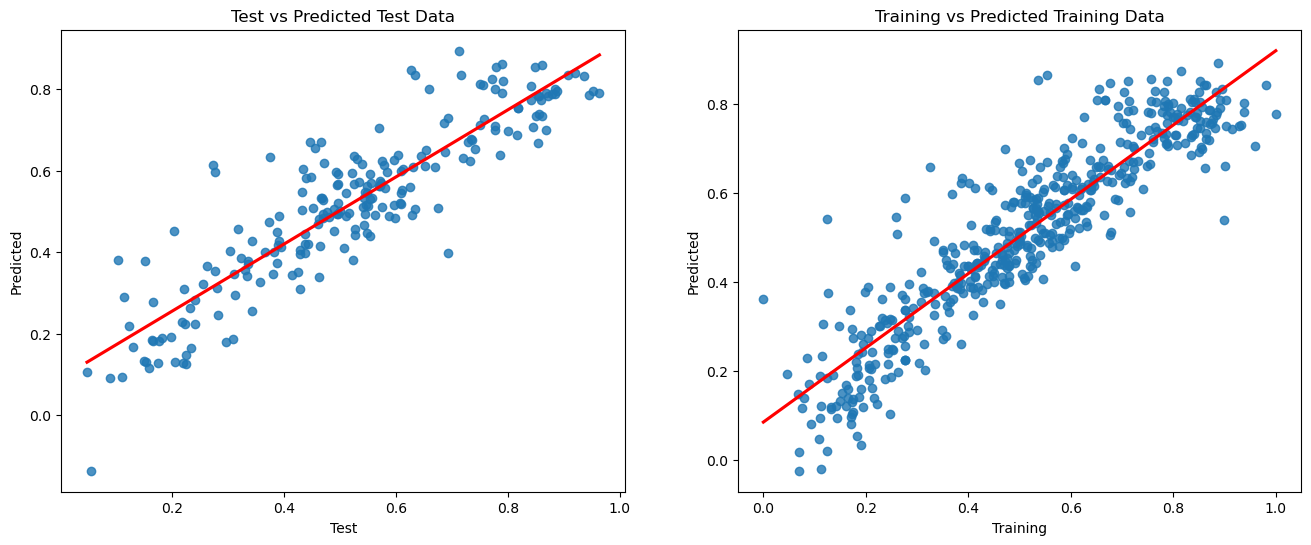

In [37]:
fig, axes = plt.subplots(1, 2,  figsize=(16, 6))

sns.regplot(ax=axes[0], x=y_test, y=y_test_pred, fit_reg=True, line_kws={"color": "red"}, ci=None)
axes[0].set_xlabel("Test")
axes[0].set_ylabel("Predicted")
axes[0].set_title('Test vs Predicted Test Data')

sns.regplot(ax=axes[1], x=y_train, y=y_train_pred, fit_reg=True, line_kws={"color": "red"}, ci=None)
axes[1].set_xlabel('Training')
axes[1].set_ylabel('Predicted')  
axes[1].set_title('Training vs Predicted Training Data')

plt.show()


**Observation**:
1. The predictions on test data and training data seems to be close to expected data.
2. There seems to be no pattern on the errors and the variance of errors (**Homoscedasticity**).

#### Independence of Error Terms

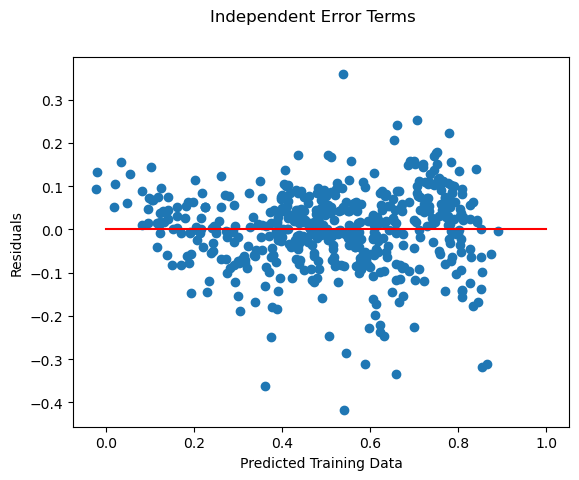

In [38]:
fig = plt.figure()
plt.plot([0,1], [0,0], 'r')
plt.scatter(y_train_pred, residuals)
fig.suptitle('Independent Error Terms')
plt.xlabel('Predicted Training Data')
plt.ylabel('Residuals') 
plt.show()

**Observations**:
The errors terms are independent of the predicted data values.

## Calulating final r2 score

In [39]:
r2_score(y_test, y_test_pred)

0.8035441330582012

## Conclusion

1. The model is a good fit with 10 predictor variables.
2. The training data set has a r-squared value of 83%
3. p-values are well under the threshold of 0.05 for all variables.
4. VIF for all predictor variables are under threshold of 5
5. The test data is showing an r-squared value of 80% which is close to training data. This validates that our model is neither an over-fit nor an under-fit.
6. All the assumptions of linear regression are validated.
7. The final model is 
$cnt = 0.191 + 0.2341	\times	yr	
-0.0969	\times	holiday	+
0.4782	\times	temp	
-0.1482	\times	windspeed	+
0.0909	\times	mnth\_September	
-0.0551	\times	season\_spring	+
0.061	\times	season\_summer	+
0.0959	\times	season\_winter	
-0.286	\times	weathersit\_light\_snow	
-0.0801	\times	weathersit\_misty	$